# vLife Virtusa
## Healthcare Cost Prediction
### Usecase Description
###### Prediction of Hospital Charges to using Age, BMI and No, of children of patient. The model uses EDA techniques to preprocess the data first and then predicts the charges incurred by the patient using Linear Regression model.

### Data Source
Data set for this usecase can be found [here](https://www.kaggle.com/mirichoi0218/insurance).


### Dataset Description
##### Features available in Data set

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance.

### Import Section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler  

from PIL import Image

> Read the csv  file

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis
### Data Munging & Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


 > Show all categorical data that need to be handeled

In [5]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print("The categorical features are : ",categorical)

The categorical features are :  ['sex', 'smoker', 'region']


> Use get dummies function to fo the hot encoding to convert categorical data to numirical one in a way that is not give extra weight for any above others 

In [6]:
df = pd.concat(      [df,
                     pd.get_dummies(df.sex), 
                     pd.get_dummies(df.smoker),
                     pd.get_dummies(df.region)], axis=1)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [8]:
df.drop(['sex'], axis=1, inplace=True)
df.drop(['smoker'], axis=1, inplace=True)
df.drop(['region'], axis=1, inplace=True)

In [9]:
df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
y = df["charges"]
df.drop(['charges'], axis=1, inplace=True)

In [11]:
df.isna().any()

age          False
bmi          False
children     False
female       False
male         False
no           False
yes          False
northeast    False
northwest    False
southeast    False
southwest    False
dtype: bool

In [12]:
df.isnull().any()

age          False
bmi          False
children     False
female       False
male         False
no           False
yes          False
northeast    False
northwest    False
southeast    False
southwest    False
dtype: bool

> Split data into training and testing

In [13]:
from sklearn.model_selection import train_test_split

train_set_x,  test_set_x, train_set_y,test_set_y = train_test_split(df, y, test_size = 0.2, random_state = 0)

> Data Scaling

In [14]:
scaler = StandardScaler()  
scaler.fit(train_set_x)  
train_set_x = scaler.transform(train_set_x)  
test_set_x = scaler.transform(test_set_x)

In [15]:
print(train_set_y)

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
1279     4189.11310
49      38709.17600
597      5594.84550
539     27346.04207
425      9788.86590
692      2362.22905
466     13224.69300
575     12222.89830
923      4320.41085
446     12730.99960
471      2203.47185
44       6079.67150
1092     3591.48000
969      8596.82780
1188    21771.34230
930      2927.06470
529      1708.00140
276      2803.69785
330     48517.56315
269      9282.48060
440      4738.26820
862     12269.68865
283     11879.10405
1120    34166.27300
1177     6496.88600
           ...     
659     14394.39815
797      4719.52405
1315    11272.33139
1201     8733.22925
99      15820.69900
850     37270.15120
448      5910.94400
755      5031.26955
976      7804.16050
115     30259.99556
777      7448.40395
72      11741.72600
845     45008.95550
537      8825.08600
849     10601.63225
174      2855.43755
87      11073.17600
551      3972.92470
705      5375.03800


In [16]:
print("train_set_x",train_set_x.shape)
print("train_set_y",train_set_y.shape)
print("test_set_x",test_set_x.shape)
print("test_set_y",test_set_y.shape)


train_set_x (1070, 11)
train_set_y (1070,)
test_set_x (268, 11)
test_set_y (268,)


In [17]:
train_set_y=train_set_y.values.reshape(train_set_y.shape[0],1)
test_set_y=test_set_y.values.reshape(test_set_y.shape[0],1)
print("train_set_x",train_set_x.shape)
print("train_set_y",train_set_y.shape)
print("test_set_x",test_set_x.shape)
print("test_set_y",test_set_y.shape)

train_set_x (1070, 11)
train_set_y (1070, 1)
test_set_x (268, 11)
test_set_y (268, 1)


## Predictive Models
**Linear Regression**



> Initialize weights and Bias with Zeros.

In [18]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0  
    return w, b

> Start the Propagate, Forward and Backward to Compute the Activations/Cost and Gradients respectively.

In [19]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    # FORWARD 
    A = np.dot(w.T,X)+b 
    cost = (1/(2*m))*np.sum((A - Y) ** 2)
    # BACKWARD 
    dz = A-Y
    dw = (1/m)*np.dot(X,dz.T)
    db = (1/m)*np.sum(dz)
    
    grads = {"dw": dw,
             "db": db}

    return grads, cost

> Optimizing the weights and Bias using the Gradient at Each Iteration

In [20]:
def optimize(w, b, X, Y,print_cost, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]

        w = w-learning_rate*dw
        b = b-learning_rate*db

        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

> Use the final weights and bias to predict the results for new unseen testing data

In [21]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    Y_prediction = np.dot(w.T,X)+b
    
    return Y_prediction 

In [22]:
def model(X_train, Y_train, X_test, Y_test,print_cost, num_iterations = 2000, learning_rate = 0.5 ):
    w, b = initialize(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train,print_cost, num_iterations, learning_rate)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(r2_score(Y_train.T, Y_prediction_train.T)))
    print("test accuracy: {} %".format(r2_score(Y_test.T, Y_prediction_test.T)))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

> Model Training 

In [23]:
d = model(train_set_x.T, train_set_y.T, test_set_x.T, test_set_y.T,print_cost = True, num_iterations = 1000, learning_rate = 0.01)

Cost after iteration 0: 158818679.044977
Cost after iteration 100: 32643249.031826
Cost after iteration 200: 20612549.744843
Cost after iteration 300: 19085649.108915
Cost after iteration 400: 18882398.797973
Cost after iteration 500: 18855056.812487
Cost after iteration 600: 18851353.718388
Cost after iteration 700: 18850847.973971
Cost after iteration 800: 18850778.070057
Cost after iteration 900: 18850768.236146
train accuracy: 0.7370262539332649 %
test accuracy: 0.7999856520408182 %


> Iterating with Multiple Learning Rate

learning rate is: 0.1
train accuracy: 0.7370262574551634 %
test accuracy: 0.7999876970680433 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 0.7370262574551631 %
test accuracy: 0.7999876968520261 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 0.7119884956736147 %
test accuracy: 0.7691010046074968 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: -0.4385069449786352 %
test accuracy: -0.3864118426771239 %

-------------------------------------------------------



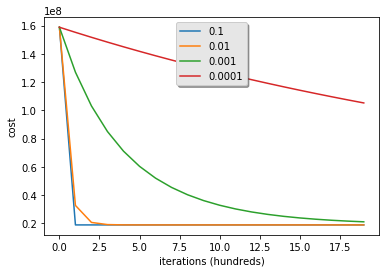

In [24]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x.T, train_set_y.T, test_set_x.T, test_set_y.T,print_cost = False, num_iterations = 2000, learning_rate = i)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### Sklearn Linear Regression 

In [25]:
lr = LinearRegression().fit(train_set_x,train_set_y)
y_train_pred = lr.predict(train_set_x)
y_test_pred = lr.predict(test_set_x)
print(lr.score(train_set_x,train_set_y))
print(lr.score(test_set_x,test_set_y))

0.7370262574551634
0.7999876970680434


In [26]:
train_set_x[0]

array([-0.14853305,  0.54530479,  2.41394802, -1.01506676,  1.01506676,
       -1.97125461,  1.97125461, -0.55071651, -0.55791981, -0.6155209 ,
        1.70862925])

In [30]:
train_set_x


array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [27]:
len(test_set_x[0])


11

In [28]:
import pickle
with open('log_reg.pickle', 'wb') as handle:
    pickle.dump(lr, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Applying Regularization with Ridge Regressor
#### Overfit Check

In [29]:
reg = Ridge(alpha=.5).fit(train_set_x,train_set_y)
y_train_pred = lr.predict(train_set_x)
y_test_pred = lr.predict(test_set_x)
print(reg.score(train_set_x,train_set_y))
print(reg.score(test_set_x,test_set_y))

0.737026194081527
0.7999671899880663


**Conclusive Analysis** 
* **Model Evaluation Metrics for Sklearn and Custom implementation aligns**

## END